## 일반적인 데이터 분류
### 와인 데이터셋 분류

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# 혼합 전에 레이블 열을 추가
red['type'] = 0
white['type'] = 1

In [6]:
wine = pd.concat([red,white])   # 판다스 데이터셋 병합

In [7]:
# 데이터셋 기술통계
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


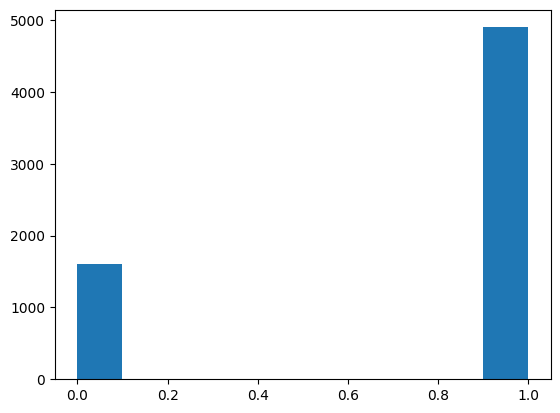

In [8]:
# 데이터 수량 히스토그램
# 데이터 양 차이는 상관없는데 적은 양의 데이터가 충분한지 체크 !!
plt.hist(wine['type'])
plt.show()

In [9]:
wine.info()   # 데이터 타입 및 결측치 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [10]:
# 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

In [11]:
wine_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0


In [12]:
wine_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,0.469730,0.753886
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.145543,0.430779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,0.333333,1.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,0.500000,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# 비복원추출하여 섞기
wine_shuffle = wine_norm.sample(frac=1)
wine_shuffle.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3693,0.247934,0.153333,0.180723,0.113497,0.031561,0.111111,0.267281,0.087334,0.317829,0.230337,0.666667,0.666667,1.0
3684,0.247934,0.153333,0.180723,0.113497,0.031561,0.111111,0.267281,0.087334,0.317829,0.230337,0.666667,0.666667,1.0
475,0.479339,0.400000,0.144578,0.024540,0.129568,0.013889,0.050691,0.225371,0.325581,0.213483,0.318841,0.333333,0.0
436,0.347107,0.393333,0.180723,0.021472,0.084718,0.128472,0.129032,0.167534,0.418605,0.191011,0.318841,0.500000,0.0
1310,0.115702,0.190000,0.048193,0.197853,0.053156,0.125000,0.313364,0.190669,0.573643,0.095506,0.275362,0.500000,1.0


In [14]:
# numpy 배열로 변환
wine_np = wine_shuffle.to_numpy()
wine_np[:5]

array([[0.24793388, 0.15333333, 0.18072289, 0.11349693, 0.03156146,
        0.11111111, 0.26728111, 0.08733372, 0.31782946, 0.23033708,
        0.66666667, 0.66666667, 1.        ],
       [0.24793388, 0.15333333, 0.18072289, 0.11349693, 0.03156146,
        0.11111111, 0.26728111, 0.08733372, 0.31782946, 0.23033708,
        0.66666667, 0.66666667, 1.        ],
       [0.47933884, 0.4       , 0.14457831, 0.02453988, 0.12956811,
        0.01388889, 0.05069124, 0.22537112, 0.3255814 , 0.21348315,
        0.31884058, 0.33333333, 0.        ],
       [0.34710744, 0.39333333, 0.18072289, 0.02147239, 0.08471761,
        0.12847222, 0.12903226, 0.16753422, 0.41860465, 0.19101124,
        0.31884058, 0.5       , 0.        ],
       [0.11570248, 0.19      , 0.04819277, 0.19785276, 0.05315615,
        0.125     , 0.31336406, 0.19066898, 0.57364341, 0.09550562,
        0.27536232, 0.5       , 1.        ]])

In [15]:
# 80%를 훈련데이터셋으로 분리
train_idx = int(len(wine_np) * 0.8)             
train_X, train_Y = wine_np[ :train_idx , :-1 ], wine_np[ :train_idx, -1]

# 20%를 테스트데이터셋으로 분리
test_X, test_Y = wine_np[ train_idx: , :-1 ], wine_np[ train_idx: , -1]

In [16]:
# 원 핫 인코딩(필요할 경우)
train_YY = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_YY = tf.keras.utils.to_categorical(test_Y, num_classes=2)
train_YY[1], test_YY[0]

(array([0., 1.], dtype=float32), array([0., 1.], dtype=float32))

In [22]:
# model 구성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

# model 속성
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 훈련 실행
history = model.fit(train_X, train_YY, epochs=25, batch_size=32,
                    validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9412 - val_loss: 0.0757 - val_accuracy: 0.9823
Epoch 2/25
122/122 [==============================] - 0s 862us/step - loss: 0.0508 - accuracy: 0.9854 - val_loss: 0.0689 - val_accuracy: 0.9862
Epoch 3/25
122/122 [==============================] - 0s 965us/step - loss: 0.0486 - accuracy: 0.9882 - val_loss: 0.0573 - val_accuracy: 0.9885
Epoch 4/25
122/122 [==============================] - 0s 866us/step - loss: 0.1246 - accuracy: 0.9625 - val_loss: 0.0719 - val_accuracy: 0.9892
Epoch 5/25
122/122 [==============================] - 0s 861us/step - loss: 0.0551 - accuracy: 0.9833 - val_loss: 0.0896 - val_accuracy: 0.9692
Epoch 6/25
122/122 [==============================] - 0s 873us/step - loss: 0.0408 - accuracy: 0.9885 - val_loss: 0.0462 - val_accuracy: 0.9885
Epoch 7/25
122/122 [==============================] - 0s 856us/step - loss: 0.0320 - accuracy: 0.9920 - val_loss: 0.0478 - val_accuracy: 0

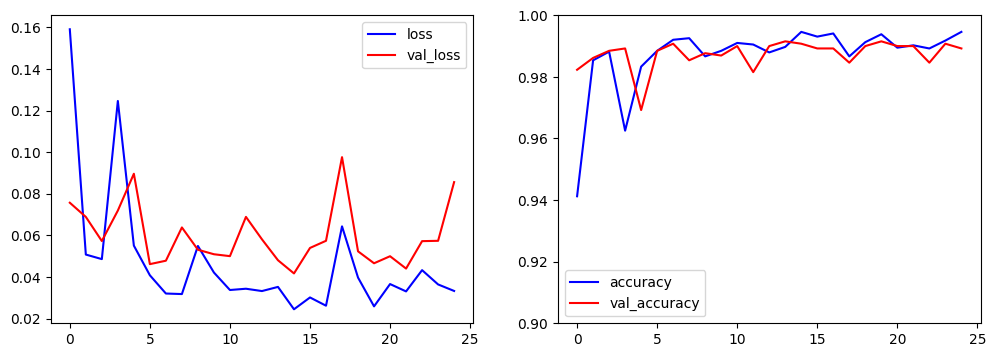

In [37]:
# 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.legend()

plt.ylim(0.9, 1.0)
plt.show()

In [32]:
# 테스트 데이터셋으로 평가
model.evaluate(test_X, test_YY)

41/41 [==============================] - 0s 634us/step - loss: 0.0531 - accuracy: 0.9908


[0.0530882254242897, 0.9907692074775696]

레드와인, 화이트와인을 99% 정확하게 구분할 수 있는 데이터셋